In [1]:
import numpy as np
import pandas as pd

In [2]:
survey_data = pd.read_csv("HappinessData-1.csv")
column_to_move = survey_data.pop("Unhappy/Happy")
survey_data.insert(len(survey_data.columns), "Unhappy/Happy", column_to_move)

In [3]:
survey_data = survey_data.dropna()

In [4]:
correlation = survey_data.corr()

#print(correlation)

#Matthew's observation:
#The highest correlation was between "Availability of a community room" and "City services Availibility"
#This was only a 0.41 correlation; which is very low. This means that the features in the dataset have
#Essentially no correlation between one another.

#Duc's observation:
#The highest correlation between the features and unhappy/happy is 
#city services availability, community maintenance, 
#and availability of community room.

In [5]:
#KNN using sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
X = survey_data.iloc[:, :-1].values
y = survey_data.iloc[:, -1].values

In [7]:
#Seperate test set and training set eith .2 and .8 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [8]:
#Sklearn's KNN algorithm with 5 neighbors
classifier_default = KNeighborsClassifier(n_neighbors=5)
classifier_default.fit(X_train, y_train)
y_default_pred = classifier_default.predict(X_test)

In [9]:
#Classification Report
classification_report_default = metrics.classification_report(y_test, y_default_pred)
print(classification_report_default)

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.60      0.92      0.73        13

    accuracy                           0.68        28
   macro avg       0.74      0.69      0.67        28
weighted avg       0.75      0.68      0.66        28



In [10]:
#Finding the perfect numbers of neighbors for sklearn's KNN algorithm
k_range = range(1, 40)
errors_list = []

In [11]:
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    errors_list.append(1.0 - metrics.accuracy_score(y_test,y_pred))

In [12]:
#Plot the accuracy values for sklearn's KNN algorithm with the range of [1, 40]
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

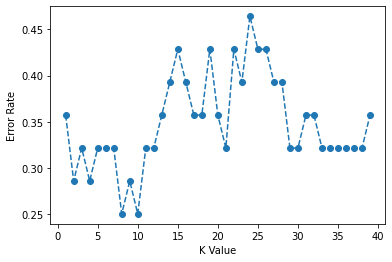

In [13]:
plt.plot(k_range,errors_list, linestyle='dashed', marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [14]:
#Predicting with custom KNN and euclidean distance
from custom_knn import KNN
from distance_methods import euclidean_distance

In [15]:
KNN_euclidean_default = KNN(euclidean_distance)
KNN_euclidean_default.fit(X_train, y_train)
y_euclidean_pred = KNN_euclidean_default.predict(X_test)

In [16]:
classification_report_euclidean = metrics.classification_report(y_test, y_euclidean_pred)
print(classification_report_euclidean)

              precision    recall  f1-score   support

           0       0.75      0.40      0.52        15
           1       0.55      0.85      0.67        13

    accuracy                           0.61        28
   macro avg       0.65      0.62      0.59        28
weighted avg       0.66      0.61      0.59        28



In [17]:
errors_euclidean_list = []

for k in k_range:
    classifier = KNN(euclidean_distance, k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    errors_euclidean_list.append(1.0 - metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Error Rate')

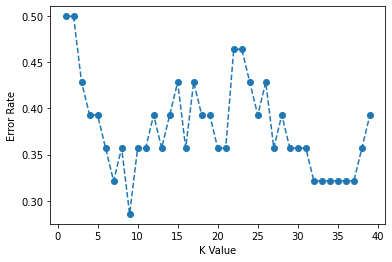

In [18]:
plt.plot(k_range, errors_euclidean_list, linestyle='dashed', marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [19]:
#Predicting with custom KNN and cosine distance
from distance_methods import cosine_distance

In [20]:
KNN_cosine_default = KNN(cosine_distance)
KNN_cosine_default.fit(X_train, y_train)
y_cosine_pred = KNN_cosine_default.predict(X_test)

In [21]:
classification_report_cosine = metrics.classification_report(y_test, y_cosine_pred)
print(classification_report_cosine)

              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.55      0.92      0.69        13

    accuracy                           0.61        28
   macro avg       0.69      0.63      0.58        28
weighted avg       0.70      0.61      0.57        28



In [22]:
errors_cosine_list = []

for k in k_range:
    classifier = KNN(cosine_distance, k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    errors_cosine_list.append(1.0 - metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Error Rate')

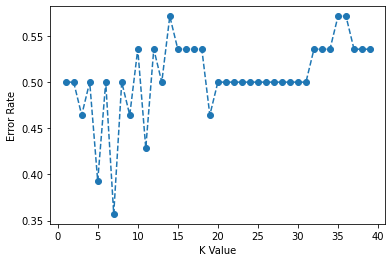

In [23]:
plt.plot(k_range, errors_cosine_list, linestyle='dashed', marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")

In [24]:
#Using K folds on existing algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=5, random_state=None)

In [25]:
classifier_kfold = KNeighborsClassifier(n_neighbors=5)
result_kfold = cross_val_score(classifier_kfold , X, y, cv = k_fold)
print("Average accuracy of Sklearn's KNN is {}".format(result_kfold.mean()))

Average accuracy of Sklearn's KNN is 0.5436507936507937


In [26]:
KNN_euclidean_kfold = KNN(euclidean_distance)
kfold_euclidean_accuracy = []

for train_index , test_index in k_fold.split(X):
    X_euclidean_train = X[train_index, :]
    X_euclidean_test = X[test_index, :]
    y_euclidean_train = y[train_index]
    y_euclidean_test = y[test_index]
     
    KNN_euclidean_kfold.fit(X_euclidean_train,y_euclidean_train)
    y_pred_kfold_euclidean = KNN_euclidean_kfold.predict(X_euclidean_test)

    kfold_euclidean_accuracy.append(metrics.accuracy_score(y_pred_kfold_euclidean , y_euclidean_test))
    
result_euclidean_kfold = sum(kfold_euclidean_accuracy)/5
print("Average accuracy of Euclidean KNN is {}".format(result_euclidean_kfold.mean()))

Average accuracy of Euclidean KNN is 0.5293650793650795


In [27]:
KNN_cosine_kfold = KNN(cosine_distance)
kfold_cosine_accuracy = []

for train_index , test_index in k_fold.split(X):
    X_cosine_train = X[train_index, :]
    X_cosinen_test = X[test_index, :]
    y_cosine_train = y[train_index]
    y_cosine_test = y[test_index]
     
    KNN_cosine_kfold.fit(X_cosine_train,y_cosine_train)
    y_pred_kfold_cosine = KNN_cosine_kfold.predict(X_cosinen_test)

    kfold_cosine_accuracy.append(metrics.accuracy_score(y_pred_kfold_cosine , y_cosine_test))
    
result_euclidean_kfold = sum(kfold_cosine_accuracy)/5
print("Average accuracy of Euclidean KNN is {}".format(result_euclidean_kfold.mean()))

Average accuracy of Euclidean KNN is 0.4119047619047619
